Custom objective function
========================

Names of free parameters:  ['A', 'mu', 'sig', 'off']
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([2.0, 9.5, 3.77, 0.96],))
Objective:  5.905184699909757
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([2.1, 9.5, 3.77, 0.96],))
Objective:  6.043095847504655
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([2.0, 9.975, 3.77, 0.96],))
Objective:  5.917710034458829
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([2.0, 9.5, 3.9585000000000004, 0.96],))
Objective:  5.832690296187552
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([2.0, 9.5, 3.77, 1.008],))
Objective:  3.2558752483292066
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([1.9, 9.7375, 3.8642499999999997, 0.984],))
Objective:  3.9063486631892577
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([1.9500000000000002, 9.143749999999999, 3.911375, 0.996],))
Objective:  3.1056248774115933
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([1.9250000000000007, 8.728124999999999, 3.9820625000000005, 1.0140000000000

Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6754593284904615, 8.302550891192633, 6.885257661889748, 1.002525170538608],))
Objective:  0.7570018657071895
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6482907874197055, 9.37462860082439, 6.626117837301571, 1.0022178944203548],))
Objective:  0.7439180774119086
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6664031481335428, 8.659910127736552, 6.798877720360355, 1.002422745165857],))
Objective:  0.7454369251653903
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6528188775981648, 9.19594898255243, 6.669307808066267, 1.0022691071067302],))
Objective:  0.742343658938629
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6459106584017458, 9.184657513658273, 6.687786876184056, 1.0026217377544446],))
Objective:  0.7399595120836662
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.636046640211714, 9.137683528635097, 6.721117081492137, 1.0023967331913521],))
Objective:  0.7412940434727752
Parameter values:  (([

Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6446803847836295, 8.75723161946907, 6.815472706529468, 1.002648270624632],))
Objective:  0.7376049849136221
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6446752476822977, 8.757078099654375, 6.815527233957177, 1.002648136098772],))
Objective:  0.7376050846790232
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6447039702690153, 8.757606596254956, 6.815314692525018, 1.0026483244008895],))
Objective:  0.7376053456567151
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6446796255136151, 8.757291395087293, 6.8154576826028705, 1.0026483917064275],))
Objective:  0.7376050387063668
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6446643549705926, 8.757035732265475, 6.815565203297432, 1.002648478602484],))
Objective:  0.7376055192828881
Parameter values:  ((['A', 'mu', 'sig', 'off'],), ([0.6446915580678374, 8.757460377848636, 6.8153831390699455, 1.002648347547234],))
Objective:  0.7376050217541752
Parameter values:  

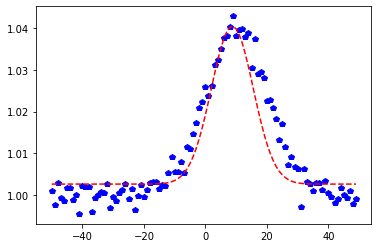

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import funcFit2 as fuf2
import scipy.optimize as sco

np.random.seed(1234)

# Creating a Gaussian with some noise
# Choose some parameters...
gPar = {"A":1.0, "sig":10.0, "mu":10.0, "off":1.0, "lin":0.0}
# Calculate profile
x = np.arange(100) - 50.0
y = gPar["off"] + gPar["A"] / np.sqrt(2*np.pi*gPar["sig"]**2) \
    * np.exp(-(x-gPar["mu"])**2/(2*gPar["sig"]**2))
# Add some noise...
y += np.random.normal(0.0, 0.002, x.size)
# ...and save the error bars
yerr = np.ones_like(x)*0.002

# Create a model object
gf = fuf2.GaussFit()
# Set guess values for the parameters
gf.assignValues({"A":2, "sig":3.77, "off":0.96, "mu":9.5})
# 'Thaw' those (the order is irrelevant)
gf.thaw(["mu", "sig", "off", "A"])


def myobjf(m, pars, x, y, silent, **kwargs):
    """
    Calculate the absolute distance between model and data points and area of the Gaussian
    
    Parameters
    ----------
    m : MBO object
        On setting the objective function later via gf.objf = myobjf, this
        gives access to the parameter values, evaluate method of the model
        and so on.
    pars : list of floats
        Parameter values for which the objective function is to be evaluated.
        A correctly ordered list of free parameter values can be obtained
        by using the method freeParamVals(). The order by names can be inspected
        using the freeParamNames() method.
    x, y : arrays
        Here, this is the data. Note that these variables are specified via the
        'args' parameter later in the call to the optimization algorithm (fmin).
    silent : boolean
        Can be used to suppress output (also specified via 'args' parameter).
    """
    model = m.evaluate(x)
    r = np.sum(np.abs(model - y))
    # Weird dependence on A
    r += 0.6*np.abs(m["A"])
    # Some informative output
    fpv = tuple(zip((m.freeParamNames(), m.freeParamVals())))
    if not silent:
        print("Parameter values: ", fpv)
        print("Objective: ", r)
    return r

# Show list of free parameters
print("Names of free parameters: ", gf.freeParamNames())

# Assign objective function. As a result of this assignment,
# the parameter values of the model will be set to those handed
# to the objective function prior to call
gf.objf = myobjf

fr = sco.fmin(gf.objf, gf.freeParamVals(), args=(x,y,False))
print("Fit result: ", fr)
# Set the parameter values to best-fit
gf.setFreeParamVals(fr)

# This reproduced the doc-string of the function
print(gf.objfInfo())

gf.parameterSummary()
# Let us see what we have done...
plt.plot(x, y, 'bp')
plt.plot(x, gf.evaluate(x), 'r--')
plt.show()